### Customer Churn Prediction Using Deep Learning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv(r'C:\Users\priya\OneDrive\Desktop\Datasets\Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.shape

(10000, 14)

###### Removing the unwanted columns

In [7]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [9]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [11]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [13]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [17]:
df.duplicated().sum()

0

In [19]:
df.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [21]:
df.Geography.value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

##### One hot endocoding the categorical 

In [23]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

##### Scaling the values

In [25]:
df = df.astype(int)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0,2,1,0,96270,0,0,0,1
9996,516,35,10,57369,1,1,1,101699,0,0,0,1
9997,709,36,7,0,1,0,1,42085,1,0,0,0
9998,772,42,3,75075,2,1,0,92888,1,1,0,1


In [27]:
#### Splitting X and Y
X=df.drop('Exited',axis=1)
y=df['Exited']

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [33]:
X_train_scaled.shape
X_test_scaled

array([[-0.57749609, -0.6557859 , -0.69539349, ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.29729735,  0.3900109 , -1.38944225, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.52560743,  0.48508334, -0.3483691 , ..., -0.57946723,
         1.73494238, -1.09499335],
       ...,
       [ 0.81311987,  0.77030065,  0.69270405, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.41876609, -0.94100321, -0.3483691 , ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.24540869,  0.00972116, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [35]:
import tensorflow 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [37]:
model = Sequential()
model.add(Dense(3,activation='sigmoid', input_dim=11))
model.add(Dense(1,activation='sigmoid'))

C:\Users\priya\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [41]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [61]:
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8329 - loss: 0.4069 - val_accuracy: 0.8350 - val_loss: 0.4005
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8332 - loss: 0.4078 - val_accuracy: 0.8350 - val_loss: 0.4005
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8390 - loss: 0.4054 - val_accuracy: 0.8344 - val_loss: 0.4004
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8322 - loss: 0.4103 - val_accuracy: 0.8344 - val_loss: 0.4003
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8394 - loss: 0.3999 - val_accuracy: 0.8344 - val_loss: 0.4004
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8336 - loss: 0.4107 - val_accuracy: 0.8344 - val_loss: 0.4004
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8366 - loss: 0.4082 - val_accuracy: 0.8344 - val_loss: 0.4004
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8344 - loss: 0.4088 - val_accu

In [53]:
model.layers[0].get_weights()

[array([[-0.01539698,  0.01665726,  0.09110511],
        [-0.17903517, -0.09021842, -3.686858  ],
        [ 0.0670682 ,  0.29912835, -0.12964354],
        [ 0.7399299 ,  0.0506542 ,  0.05780504],
        [ 0.22727   ,  0.43284613,  0.07291482],
        [ 0.0086978 ,  0.16229244, -0.15431146],
        [-1.331888  ,  1.5038372 , -1.0791355 ],
        [ 0.21601205, -0.21892768,  0.34883958],
        [ 0.73232454, -0.7176607 ,  0.10927048],
        [ 0.15104952, -0.13666308,  0.07288542],
        [-0.70713496,  0.22897986,  0.14302288]], dtype=float32),
 array([0.11071791, 0.66800785, 0.50300014], dtype=float32)]

In [55]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [57]:
y_pred = np.where(y_log>0.5,1,0)

In [59]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.837

#### Here we can change the activation function, no of layers, no of nodes in layers to imporove the accuracy of model.

In [62]:
import matplotlib.pyplot as plt


In [67]:
history.history

{'accuracy': [0.8346874713897705,
  0.8356249928474426,
  0.8357812762260437,
  0.8348437547683716,
  0.8357812762260437,
  0.835156261920929,
  0.835156261920929,
  0.8353124856948853,
  0.8359375,
  0.8354687690734863,
  0.8349999785423279,
  0.835156261920929,
  0.8365625143051147,
  0.8354687690734863,
  0.8357812762260437,
  0.8353124856948853,
  0.835156261920929,
  0.8349999785423279,
  0.8356249928474426,
  0.8360937237739563,
  0.8364062309265137,
  0.8359375,
  0.8368750214576721,
  0.8371875286102295,
  0.8378124833106995,
  0.8382812738418579,
  0.8382812738418579,
  0.8387500047683716,
  0.83984375,
  0.8396875262260437,
  0.83984375,
  0.8403124809265137,
  0.8392187356948853,
  0.8409374952316284,
  0.8407812714576721,
  0.8414062261581421,
  0.8415625095367432,
  0.8417187333106995,
  0.8418750166893005,
  0.8423437476158142,
  0.8424999713897705,
  0.842968761920929,
  0.8426562547683716,
  0.8423437476158142,
  0.8440625071525574,
  0.8442187309265137,
  0.84437501430

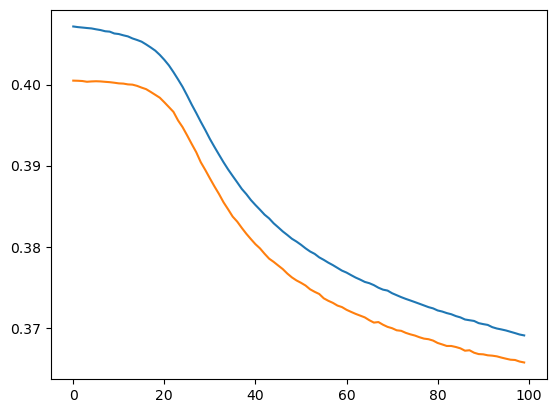

In [75]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

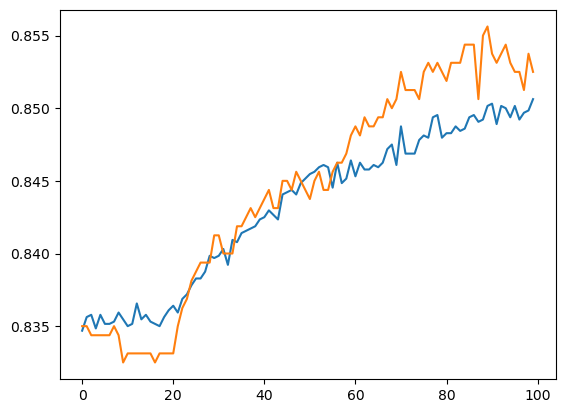

In [83]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])